In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [9]:
# Loading data
file_path = Path("myopia.csv")
df_my = pd.read_csv(file_path)
df_my.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [28]:
# drop Myopic column

y = df_my["MYOPIC"].values
X = df_my.drop("MYOPIC", axis=1) 
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [29]:
# Standarize data with StandarScaler
my_scaled = StandardScaler().fit_transform(X)
print(my_scaled[0:14])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]
 [-0.42021911  1.50779097 -0.5249931  -1.54047905  0.0942193  -0.02528499
  -0.2453042   1.04507157 -0.03443904 -0.22140908  1

In [30]:
# Applying PCA to reduce dimensions

# Initialize PCA model
pca = PCA(n_components=.85)

my_pca = pca.fit_transform(my_scaled)
print(my_pca)

[[ 5.35502713e-01  1.14500427e+00 -1.38501894e+00 ... -1.95889156e+00
  -1.92299652e+00  2.67528503e-02]
 [-6.24705593e-01 -1.57578643e+00 -7.94253057e-01 ... -4.55206257e-01
   2.85332291e-01  6.89682613e-01]
 [-9.33479366e-01 -7.17076224e-01  8.20149929e-01 ...  2.58207123e-02
  -3.08170124e-02 -4.31499076e-01]
 ...
 [-8.90082017e-01 -2.30800520e+00  2.68101833e-01 ... -3.28287099e-01
  -4.89876908e-01  1.82269069e+00]
 [-1.12399979e+00  4.51889784e-01  1.65865634e-03 ... -4.48120246e-01
   2.39685015e-01 -1.59282241e+00]
 [-6.91533913e-01 -7.37046188e-01 -1.05290000e+00 ... -1.44759385e+00
  -2.73804495e-01  9.46160724e-01]]


In [31]:
#compare original number of features vs reduced number with pca
print("Original number of features:", my_scaled.shape[1])
print("Reduced number of features:", my_pca.shape[1])

Original number of features: 14
Reduced number of features: 9


In [32]:
# Transform PCA data to a DataFrame
df_pca = pd.DataFrame(
    data=my_pca, columns=["principal component 1", "principal component 2","principal component 3", 
                              "principal component 4", "principal component 5","principal component 5",
                             "principal component 7", "principal component 8","principal component 9"
                             ]
)
df_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 5,principal component 7,principal component 8,principal component 9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007


In [33]:
#reduce with t-sne
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca)

C:\Users\nico.cosereanu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [34]:
tsne_features.shape

(618, 2)

In [37]:
# Prepare to plot the dataset
# The first column of transformed features
X['x'] = tsne_features[:,0]
# The second column of transformed features
X['y'] = tsne_features[:,1]
X["class"] = df_my["MYOPIC"]

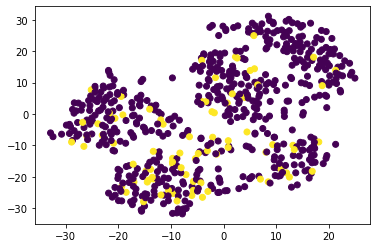

In [39]:
plt.scatter(X["x"], X["y"], c=X['class'] )
plt.show()

In [53]:
# Transform PCA data to a DataFrame
df_tsne = pd.DataFrame(
    data=tsne_features, columns=["principal component 1", "principal component 2"
                             ]
)
df_tsne.head()

,principal component 1,principal component 2
0,-11.494990,-3.243579
1,-11.351980,-25.833561
2,17.330091,22.633808
3,5.871737,14.389834
4,-28.744562,-8.423355


C:\Users\nico.cosereanu\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


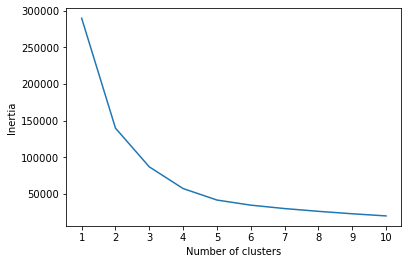

In [54]:
# K Method
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_tsne)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [56]:
#initialize model
model = KMeans(n_clusters=5, random_state=5)


In [57]:
#fit model
model.fit(df_tsne)

KMeans(n_clusters=5, random_state=5)

In [59]:
# Get predictions
predictions = model.predict(df_tsne)
print(predictions)

[0 1 3 4 0 4 4 3 3 3 2 1 3 3 0 3 3 3 2 3 4 4 4 4 4 3 1 0 1 0 0 2 1 4 0 2 2
 4 4 4 1 3 2 0 0 4 2 4 0 1 1 4 4 0 4 4 1 1 4 4 4 0 3 4 2 0 3 4 3 3 0 2 2 2
 4 0 3 2 4 3 1 4 0 0 4 1 0 2 0 1 3 3 1 4 4 0 4 1 0 3 2 3 4 3 0 4 3 3 1 4 2
 4 2 1 1 1 3 4 1 3 1 3 1 3 2 0 3 0 1 0 0 4 4 3 1 4 3 0 3 4 0 4 1 4 1 1 4 2
 0 2 0 3 2 1 3 3 0 1 0 0 4 4 2 4 0 2 2 4 0 3 1 1 2 3 0 4 0 1 0 0 4 2 3 0 3
 2 0 1 4 1 1 0 1 4 1 4 3 4 1 0 0 0 4 3 3 1 0 4 1 1 2 0 1 1 0 3 2 4 4 1 1 4
 4 3 3 4 2 2 3 4 2 3 0 2 0 1 1 3 3 3 2 0 3 4 0 4 0 0 2 4 3 2 1 2 0 0 0 0 0
 4 2 3 0 1 1 3 1 1 3 4 4 3 3 2 4 0 4 0 1 0 1 2 1 0 1 0 3 0 4 3 3 4 0 3 2 3
 3 4 3 4 3 0 1 2 0 0 2 3 4 2 0 1 4 1 1 1 0 4 1 2 4 1 1 2 1 3 3 1 3 4 4 1 3
 1 1 3 1 0 4 4 3 4 3 0 0 0 0 2 2 4 3 4 1 3 3 4 1 4 0 3 1 1 3 4 4 1 4 4 3 4
 0 3 3 1 0 1 3 3 1 3 2 1 3 4 1 2 3 2 1 2 0 2 3 1 1 3 3 1 4 3 4 4 0 0 2 3 0
 2 3 4 0 0 1 4 4 3 1 4 3 4 1 2 4 0 0 1 3 0 0 4 2 0 3 3 1 2 0 0 1 2 0 1 3 2
 1 4 1 0 3 2 2 2 1 2 3 2 3 4 1 2 1 4 4 1 2 4 1 2 4 0 0 2 3 0 2 0 0 3 3 2 0
 0 1 2 4 1 3 1 1 2 2 3 3 

In [60]:
# Add a new class column to dataframe
df_tsne["class"] = model.labels_
df_tsne.head()

,principal component 1,principal component 2,class
0,-11.494990,-3.243579,0
1,-11.351980,-25.833561,1
2,17.330091,22.633808,3
3,5.871737,14.389834,4
4,-28.744562,-8.423355,0


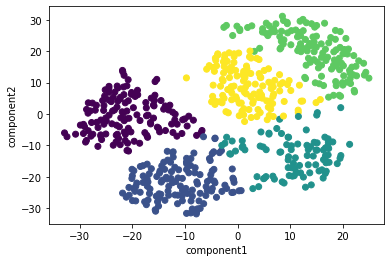

In [62]:
plt.scatter(x=df_tsne["principal component 1"], y=df_tsne['principal component 2'], c=df_tsne['class'])
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

Yes the data can be clustered. Based on the findings above, we have between 3 and 5 main clusters of data.